## EMPLOYMENT ATTRITION

The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.
1. Satisfaction Level
2. Last evaluation
3. Number of projects
4. Average monthly hours
5. Time spent at the company
6. Whether they have had a work accident
7. Whether they have had a promotion in the last 5 years
8. Departments (column sales)
9. Salary
10. Whether the employee has left

Objective
What type of employees are leaving? Determine which employees are prone to leave next. Present your results in the presentation sheet's presentation area.


In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Load Dataset
current_employees = pd.read_excel("EmploymentAttrition.xlsx", "Existing employees")
past_employees = pd.read_excel("EmploymentAttrition.xlsx", "Employees who have left")


In [4]:
#Print current_employees
current_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,employment_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [5]:
#Print past_employees
past_employees.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,employment_status
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [6]:
print('total number of current employees: ', current_employees.shape)
print('total number of past employees: ', past_employees.shape)

total number of current employees:  (11428, 11)
total number of past employees:  (3571, 11)


In [7]:
#Merge both tables
df = current_employees.merge(past_employees, how ='outer')
df

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,employment_status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
14994,14995,0.40,0.57,2,151,3,0,0,support,low,0
14995,14996,0.37,0.48,2,160,3,0,0,support,low,0
14996,14997,0.37,0.53,2,143,3,0,0,support,low,0
14997,14998,0.11,0.96,6,280,4,0,0,support,low,0


After successfully merging both tables,
Working with merged dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  employment_status      14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


## DATASET INFORMATION

* The dataset has 14999 rows and 11 columns of which has no empty cells

* There are 3 data types within the dataset 

* Some of the columns are reflecting wrong datatypes and need to be channged (work_accident, promotion_last_5years, dept, salary, employment status)


In [9]:
#convert data type of work_accident column
df.Work_accident = df.Work_accident.astype('category')

In [10]:
#convert data type of promotion_last_5years column
df.promotion_last_5years = df.promotion_last_5years.astype('category')

In [11]:
#convert data type of dept column
df.dept = df.dept.astype('category')

In [12]:
#convert data type of salary column
df.salary = df.salary.astype('category')

In [13]:
#convert data type of employment_status column
df.employment_status = df.employment_status.astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Emp ID                 14999 non-null  int64   
 1   satisfaction_level     14999 non-null  float64 
 2   last_evaluation        14999 non-null  float64 
 3   number_project         14999 non-null  int64   
 4   average_montly_hours   14999 non-null  int64   
 5   time_spend_company     14999 non-null  int64   
 6   Work_accident          14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   dept                   14999 non-null  category
 9   salary                 14999 non-null  category
 10  employment_status      14999 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 894.4 KB


## EXPLORATORY DATA ANALYSIS

In [15]:
#Run df.describe()
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000


From df.describe(),

* All columns have 14999 entries

* The average satisfacton level of all employees(past and existing) is approx 0.6 out of 1.0

* The average number of projects done by all employees(past and existing) is approx 3.8 against a max of 7.0 done by a few employees.

* The average of the average amount of monthly hours of all employees(past and exisitng) is approx 201.1 and the max average monthly hours accrued by any employee is 310.

* All employees have spent between 2-10 years at the company averageing at 3.8 years per employee.

* 76.2% of employees in the dataset are still at the company and 23.8% are in the category of employees that have left the company

In [54]:
#Plotting pie chart for employment_status
es_df = df['employment_status'].value_counts().rename_axis('emp_status').reset_index(name = 'counts')
es_df.head()

,emp_status,counts
0,1,11428
1,0,3571


Indication

* 1 = Employees still at the company
* 0 = Employees who have left the company

In [17]:
total_counts = es_df.counts.sum()
total_counts

14999

In [18]:
def autopct_format(prct_value):
    print(prct_value)
    return '{:.1f}%\n{:.0f}'.format(prct_value, total_counts*prct_value/100)

In [19]:
plabels = es_df.status
pvalues = es_df.counts
pexplodes = [0.04, 0]
colourlol = ['#313d5a', '#2c6e49']

76.19174718856812
23.808254301548004


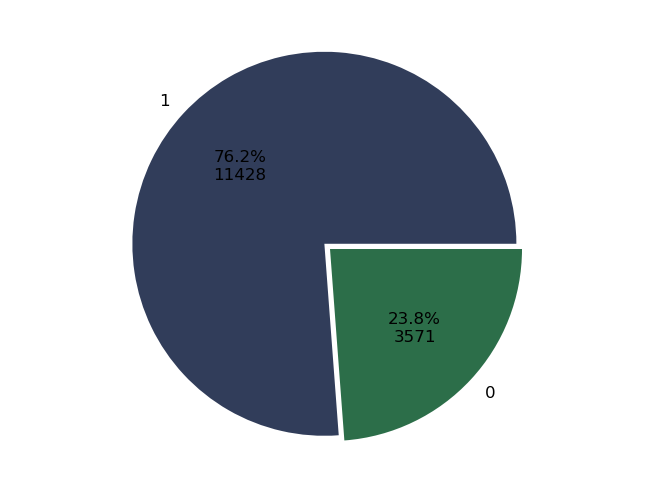

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')


ax.pie(pvalues, labels = plabels, autopct=autopct_format, explode=pexplodes,textprops={'fontsize' : 12}, colors=colourlol)
plt.show()

A pie chart showing the ratio of existing employees to past employees. it indicates that the data is imbalanced because of the large gap betwee the two categories.

In [66]:
#Plotting bar chart of number of projects against number of employees

project_current_df = current_employees['number_project'].value_counts().rename_axis('projects').reset_index(name = 'current')
project_current_df

,projects,current
0,3,3983
1,4,3956
2,5,2149
3,2,821
4,6,519


In [61]:
project_past_df = past_employees['number_project'].value_counts().rename_axis('projects').reset_index(name = 'past')
project_df

,projects,past
0,2,1567
1,6,655
2,5,612
3,4,409
4,7,256
5,3,72


In [70]:
project_df= project_current_df.merge(project_past_df, how ='outer')
project_df

,projects,current,past
0,3,3983.0,72
1,4,3956.0,409
2,5,2149.0,612
3,2,821.0,1567
4,6,519.0,655
5,7,NaN,256


In [100]:
project_df.set_index('projects')

,current,past
projects,,
3,3983.0,72
4,3956.0,409
5,2149.0,612
2,821.0,1567
6,519.0,655
7,NaN,256


<AxesSubplot:xlabel='projects'>

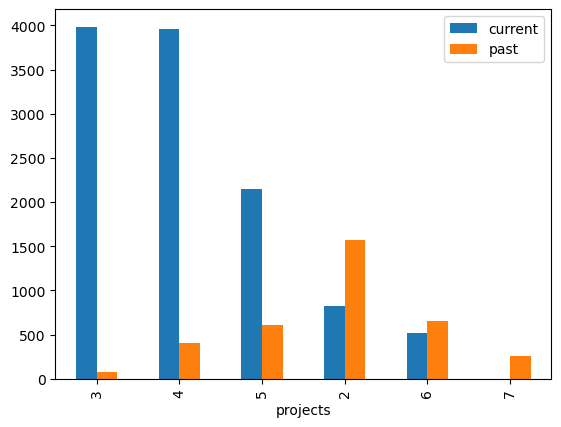

In [101]:
project_df.set_index('projects').plot(kind='bar')

* The bar chart above is showing the number of employees(blue showing current employees and orange showing past employees).

* It is noticable that all employees that had taken up <6 projects have left the company.

Stuff you can add.

* number of employees chart
* monthly projects chart
* time spent on projects chart
* department against employment status chart
* ETC